In [16]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#read all file
all_files_path=glob(r'C:\Users\21694\Path finding in neurogaming\BCICIV_2b_gdf\*.gdf')
print(len(all_files_path))

45


In [18]:
all_files_path[0]

'C:\\Users\\21694\\Path finding in neurogaming\\BCICIV_2b_gdf\\B0101T.gdf'

In [19]:
healthy_file_path=[i for i in all_files_path if  'T' in i.split('\\')[1]]
patient_file_path=[i for i in all_files_path if  'E' in i.split('\\')[1]]

In [20]:
def read_data(file_path):
    datax=mne.io.read_raw_gdf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(l_freq=1,h_freq=45)
    epochs=mne.make_fixed_length_epochs(datax,duration=25,overlap=0)
    epochs=epochs.get_data()
    return epochs #trials,channel,length

In [24]:
data=read_data(healthy_file_path)

TypeError: _getfullpathname: path should be string, bytes or os.PathLike, not list

In [42]:
import mne
%matplotlib inline
import numpy as np

# Mention the file path to the dataset
filename = r'C:\Users\21694\Path finding in neurogaming\BCICIV_2b_gdf\B0101T.gdf'

raw = mne.io.read_raw_gdf(filename)

print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from C:\Users\21694\Path finding in neurogaming\BCICIV_2b_gdf\B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2005-10-25 09:35:11 UTC
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
>
['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']


<ipython-input-42-474d9cbbad7c>:8: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filename)


In [43]:
# Find the events time positions
events, _ = mne.events_from_annotations(raw)

# Pre-load the data

raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz

raw.filter(7., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels

raw.info['bads'] += ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the datset into 288 events for all 2 classes

tmin, tmax = 1., 4.
# left_hand = 769,right_hand = 770
event_id = dict({'769': 7,'770': 8})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
8 matching events found


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 751 original time points ...
0 bad epochs dropped


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Evoked | '769' (average, N=1), 1 – 4 s, baseline off, 3 ch, ~26 kB>


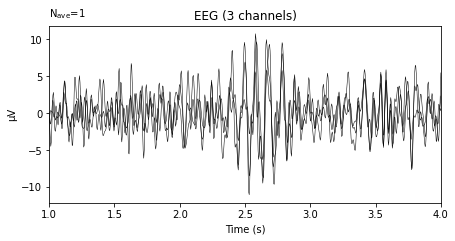

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Evoked | '770' (average, N=7), 1 – 4 s, baseline off, 3 ch, ~26 kB>


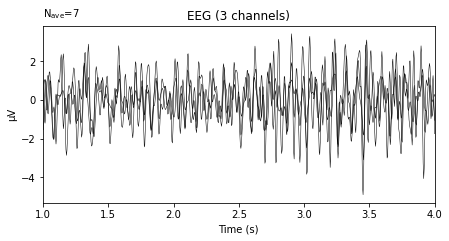

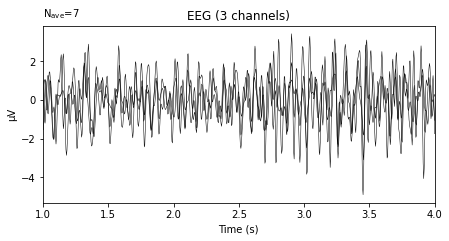

In [44]:
# left_hand = 769,right_hand = 770

# Left hand epoch average plot

evoked = epochs['769'].average()
print(evoked)
evoked.plot(time_unit='s')

# Right hand epoch average plot

evoked = epochs['770'].average()
print(evoked)
evoked.plot(time_unit='s')


In [45]:
# Getting labels and changing labels from 7,8-> 1,2
labels = epochs.events[:,-1] - 7 + 1 

data = epochs.get_data()

In [47]:
#Wavelet Packet Decomposition
import pywt

# signal is decomposed to level 5 with 'db4' wavelet

def wpd(X): 
    coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    
    Bands = np.empty((8,x.shape[0],x.shape[1],30)) # 8 freq band coefficients are chosen from the range 4-32Hz
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
             pos = []
        
             C = wpd(x[i,ii,:]) 
             pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
        
             for b in range(1,9):
                 Bands[b-1,i,ii,:] = C[pos[b]].data
        
    return Bands

wpd_data = feature_bands(data)

In [48]:
from mne.decoding import CSP # Common Spatial Pattern Filtering
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.model_selection import ShuffleSplit

# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(labels.reshape(-1,1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = []
ka = []
prec = []
recall = []

In [58]:
#Model Build

def build_classifier(num_layers = 1):
    classifier = Sequential()
    #First Layer
    classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24, 
                         kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
    classifier.add(Dropout(0.5))
    # Intermediate Layers
    for itr in range(num_layers):
        classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', 
                             kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
        classifier.add(Dropout(0.5))   
    # Last Layer
    classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [59]:
#10-Fold Cross Validation

for train_idx, test_idx in cv.split(labels):
    
    Csp = [];ss = [];nn = [] # empty lists
    
    label_train, label_test = labels[train_idx], labels[test_idx]
    y_train, y_test = X_out[train_idx], X_out[test_idx]
    
    # CSP filter applied separately for all Frequency band coefficients
    
    Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
    ss = preprocessing.StandardScaler()

    X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train) for x  in range(8)),axis=-1))

    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:]) for x  in range(8)),axis=-1))
    
    nn = build_classifier()  
    
    nn.fit(X_train, y_train, batch_size = 32, epochs = 300)
    
    y_pred = nn.predict(X_test)
    pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

    acc.append(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
    ka.append(cohen_kappa_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
    prec.append(precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    recall.append(recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))

Computing rank from data with rank=None
    Using tolerance 3.1e-08 (2.2e-16 eps * 3 dim * 4.6e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-08 (2.2e-16 eps * 3 dim * 7.1e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-08 (2.2e-16 eps * 3 dim * 5.1e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.8e-08 (2.2e-16 eps * 3 dim * 1e+08  max singular value)
    Estimated rank (m

1/1 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 1.0000
Epoch 38/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 1.0000
Epoch 39/300
1/1 [==============================] - 0s 5ms/step - loss: 0.2035 - accuracy: 1.0000
Epoch 40/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 1.0000
Epoch 41/300
1/1 [==============================] - 0s 4ms/step - loss: 0.2253 - accuracy: 1.0000
Epoch 42/300
1/1 [==============================] - 0s 4ms/step - loss: 0.2150 - accuracy: 1.0000
Epoch 43/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 1.0000
Epoch 44/300
1/1 [==============================] - 0s 5ms/step - loss: 0.2450 - accuracy: 1.0000
Epoch 45/300
1/1 [==============================] - 0s 4ms/step - loss: 0.1935 - accuracy: 1.0000
Epoch 46/300
1/1 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 1.0000
Epoch 47/300
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 1.0000
Epoch 121/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 1.0000
Epoch 122/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 1.0000
Epoch 123/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 1.0000
Epoch 124/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 1.0000
Epoch 125/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 1.0000
Epoch 126/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 1.0000
Epoch 127/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 1.0000
Epoch 128/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 1.0000
Epoch 129/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0506 - accuracy: 1.0000
Epoch 130/300
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 1.0000
Epoch 203/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 204/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 1.0000
Epoch 205/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 206/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 207/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 1.0000
Epoch 208/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 209/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 1.0000
Epoch 210/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 211/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 212/300
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 285/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 286/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 287/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 288/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 1.0000
Epoch 289/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 290/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 291/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 292/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 293/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 294/300
1/1 [=====

C:\Users\21694\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:638: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


ValueError: n_classes must be >= 2.

In [60]:
print("X_train shape:", X_train.shape)


X_train shape: (6, 24)


In [61]:
import pandas as pd

scores = {'Accuracy':acc,'Kappa':ka,'Precision':prec,'Recall':recall}

Es = pd.DataFrame(scores)

avg = {'Accuracy':[np.mean(acc)],'Kappa':[np.mean(ka)],'Precision':[np.mean(prec)],'Recall':[np.mean(recall)]}

Avg = pd.DataFrame(avg)


T = pd.concat([Es,Avg])

T.index = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Avg']
T.index.rename('Fold',inplace=True)

print(T)

ValueError: Length mismatch: Expected axis has 2 elements, new values have 11 elements

In [62]:
# Model Build
def build_classifier(num_layers=1):
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(units=124, kernel_initializer='uniform', activation='relu', input_dim=24,
                         kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
    classifier.add(Dropout(0.5))
    # Intermediate Layers
    for itr in range(num_layers):
        classifier.add(Dense(units=124, kernel_initializer='uniform', activation='relu',
                             kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
        classifier.add(Dropout(0.5))
    # Last Layer (Binary Classification)
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  # Sigmoid activation
    classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# 10-Fold Cross Validation
for train_idx, test_idx in cv.split(labels):

    Csp = []; ss = []; nn = []  # empty lists

    label_train, label_test = labels[train_idx], labels[test_idx]
    y_train, y_test = X_out[train_idx], X_out[test_idx]

    # CSP filter applied separately for all Frequency band coefficients
    Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
    ss = preprocessing.StandardScaler()

    X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x, train_idx, :, :], label_train) for x in range(8)), axis=-1))
    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x, test_idx, :, :]) for x in range(8)), axis=-1))

    nn = build_classifier()

    nn.fit(X_train, y_train, batch_size=32, epochs=300)

    y_pred = nn.predict(X_test)
    pred = (y_pred > 0.5).astype(int)  # Binary classification thresholding

    acc.append(accuracy_score(y_test, pred))
    ka.append(cohen_kappa_score(y_test, pred))
    prec.append(precision_score(y_test, pred, average='weighted'))
    recall.append(recall_score(y_test, pred, average='weighted'))


Computing rank from data with rank=None
    Using tolerance 3.1e-08 (2.2e-16 eps * 3 dim * 4.6e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-08 (2.2e-16 eps * 3 dim * 7.1e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-08 (2.2e-16 eps * 3 dim * 5.1e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.8e-08 (2.2e-16 eps * 3 dim * 1e+08  max singular value)
    Estimated rank (m

ValueError: in user code:

    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\losses.py", line 1807, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


In [63]:
import zipfile as zf
files = zf.ZipFile("BCICIV_2a_gdf.zip", 'r')
files.extractall('BCICIV_2a_gdf')
files.close()

In [80]:
import mne
%matplotlib inline
import numpy as np

# Mention the file path to the dataset
filename = 'C:\\Users\\21694\\PFIN\\BCICIV_2a_gdf\\A02T.gdf'

raw = mne.io.read_raw_gdf(filename)

print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from C:\Users\21694\PFIN\BCICIV_2a_gdf\A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2004-11-15 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


C:\Users\21694\anaconda3\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [81]:
# Find the events time positions
events, _ = mne.events_from_annotations(raw)

# Pre-load the data

raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz

raw.filter(7., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels

raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the datset into 288 events for all 4 classes

tmin, tmax = 1., 4.
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772
event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Evoked | '769' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~155 kB>


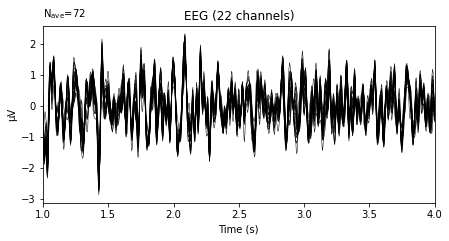

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Evoked | '770' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~155 kB>


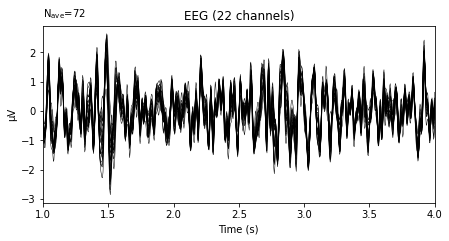

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Evoked | '771' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~155 kB>


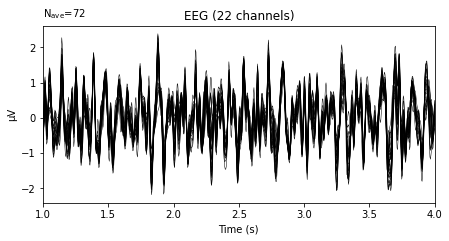

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Evoked | '772' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~155 kB>


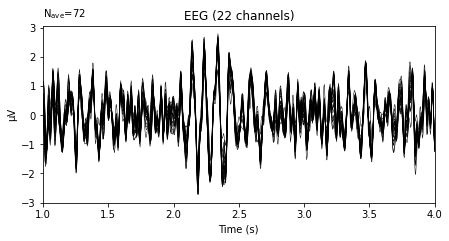

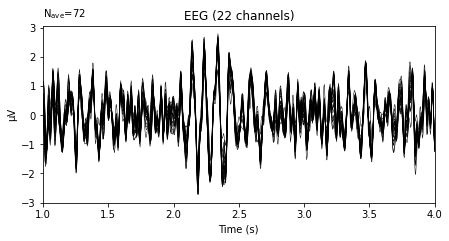

In [82]:
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772

# Left hand epoch average plot

evoked = epochs['769'].average()
print(evoked)
evoked.plot(time_unit='s')

# Right hand epoch average plot

evoked = epochs['770'].average()
print(evoked)
evoked.plot(time_unit='s')

# Foot epoch average plot

evoked = epochs['771'].average()
print(evoked)
evoked.plot(time_unit='s')

# Tongue epoch average plot

evoked = epochs['772'].average()
print(evoked)
evoked.plot(time_unit='s')

In [83]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1] - 7 + 1 

data = epochs.get_data()

In [84]:
import pywt

# signal is decomposed to level 5 with 'db4' wavelet

def wpd(X): 
    coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    
    Bands = np.empty((8,x.shape[0],x.shape[1],30)) # 8 freq band coefficients are chosen from the range 4-32Hz
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
            pos = []
            C = wpd(x[i,ii,:]) 
            pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
            for b in range(1,9):
                Bands[b-1,i,ii,:] = C[pos[b]].data
        
    return Bands

wpd_data = feature_bands(data)

In [85]:
from mne.decoding import CSP # Common Spatial Pattern Filtering
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.model_selection import ShuffleSplit

# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(labels.reshape(-1,1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = []
ka = []
prec = []
recall = []

In [86]:
def build_classifier(num_layers = 1):
    classifier = Sequential()
    #First Layer
    classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32, 
                         kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
    classifier.add(Dropout(0.5))
    # Intermediate Layers
    for itr in range(num_layers):
        classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', 
                             kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
        classifier.add(Dropout(0.5))   
    # Last Layer
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [87]:
for train_idx, test_idx in cv.split(labels):
    
    Csp = [];ss = [];nn = [] # empty lists
    
    label_train, label_test = labels[train_idx], labels[test_idx]
    y_train, y_test = X_out[train_idx], X_out[test_idx]
    
    # CSP filter applied separately for all Frequency band coefficients
    
    Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
    ss = preprocessing.StandardScaler()

    X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train) for x  in range(8)),axis=-1))

    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:]) for x  in range(8)),axis=-1))
    
    nn = build_classifier()  
    
    nn.fit(X_train, y_train, batch_size = 32, epochs = 300)
    
    y_pred = nn.predict(X_test)
    pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

    acc.append(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
    ka.append(cohen_kappa_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
    prec.append(precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    recall.append(recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))


Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.5e+09  max singular value)


Done.
Computing rank from data with rank=None
    Using tolerance 8.6e-07 (2.2e-16 eps * 22 dim * 1.8e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-07 (2.2e-16 eps * 22 dim * 1.7e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.7e-07 (2.2e-16 eps * 22 dim * 1.6e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.8e-07 (2.2e-16 eps * 22 dim * 1.8e+08  max singular v

8/8 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.9696
Epoch 73/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.9478
Epoch 74/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.9696
Epoch 75/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.9652
Epoch 76/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.9609
Epoch 77/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.9478
Epoch 78/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9652
Epoch 79/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.9522
Epoch 80/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.9609
Epoch 81/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.9609
Epoch 82/300
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9652
Epoch 156/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9870
Epoch 157/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9913
Epoch 158/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1890 - accuracy: 0.9913
Epoch 159/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9826
Epoch 160/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1993 - accuracy: 0.9783
Epoch 161/300
8/8 [==============================] - 0s 971us/step - loss: 0.1879 - accuracy: 0.9826
Epoch 162/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9826
Epoch 163/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9826
Epoch 164/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.9652
Epoch 165/300
8/8 [===

8/8 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9870
Epoch 238/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.9826
Epoch 239/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9870
Epoch 240/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9783
Epoch 241/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9957
Epoch 242/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 1.0000
Epoch 243/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9957
Epoch 244/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9783
Epoch 245/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9739
Epoch 246/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1589 - accuracy: 0.9913
Epoch 247/300
8/8 [=====

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 22 dim * 3.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 22 dim * 3.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22

8/8 [==============================] - 0s 2ms/step - loss: 0.7661 - accuracy: 0.7957
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.7783
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.7826
Epoch 11/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.8043
Epoch 12/300
8/8 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.7957
Epoch 13/300
8/8 [==============================] - 0s 955us/step - loss: 0.6489 - accuracy: 0.8304
Epoch 14/300
8/8 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.8348
Epoch 15/300
8/8 [==============================] - 0s 1ms/step - loss: 0.6080 - accuracy: 0.8522
Epoch 16/300
8/8 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.8565
Epoch 17/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.8478
Epoch 18/300
8/8 [==============

8/8 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9565
Epoch 92/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.9348
Epoch 93/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.9609
Epoch 94/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.9609
Epoch 95/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9609
Epoch 96/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9652
Epoch 97/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.9609
Epoch 98/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9696
Epoch 99/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9652
Epoch 100/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.9522
Epoch 101/300
8/8 [=============

Epoch 174/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1921 - accuracy: 0.9783
Epoch 175/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1986 - accuracy: 0.9739
Epoch 176/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9783
Epoch 177/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9957
Epoch 178/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9783
Epoch 179/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9870
Epoch 180/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9957
Epoch 181/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9739
Epoch 182/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9957
Epoch 183/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1582 - accuracy: 0.9957
Epoch 184/

8/8 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9957
Epoch 257/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9913
Epoch 258/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1675 - accuracy: 0.9696
Epoch 259/300
8/8 [==============================] - 0s 936us/step - loss: 0.1351 - accuracy: 0.9957
Epoch 260/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9739
Epoch 261/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1438 - accuracy: 0.9913
Epoch 262/300
8/8 [==============================] - 0s 967us/step - loss: 0.1482 - accuracy: 0.9826
Epoch 263/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9913
Epoch 264/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.9870
Epoch 265/300
8/8 [==============================] - 0s 991us/step - loss: 0.1337 - accuracy: 0.9913
Epoch 266/300
8/8 

Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-06 (2.2e-16 eps * 22 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.6e-06 (2.2e-16 eps * 22 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.8e-06 (2.2e-16 

8/8 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8783
Epoch 28/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8870
Epoch 29/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8826
Epoch 30/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.9087
Epoch 31/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8826
Epoch 32/300
8/8 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.9043
Epoch 33/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.9043
Epoch 34/300
8/8 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8913
Epoch 35/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.9304
Epoch 36/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.9130
Epoch 37/300
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9609
Epoch 111/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.9565
Epoch 112/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9522
Epoch 113/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9565
Epoch 114/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9522
Epoch 115/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.9565
Epoch 116/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9826
Epoch 117/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.9609
Epoch 118/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9696
Epoch 119/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.9522
Epoch 120/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9826
Epoch 193/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9739
Epoch 194/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.9783
Epoch 195/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9696
Epoch 196/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9783
Epoch 197/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9826
Epoch 198/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9870
Epoch 199/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9957
Epoch 200/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9739
Epoch 201/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2053 - accuracy: 0.9696
Epoch 202/300
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9826
Epoch 275/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9913
Epoch 276/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1714 - accuracy: 0.9826
Epoch 277/300
8/8 [==============================] - 0s 855us/step - loss: 0.1428 - accuracy: 0.9870
Epoch 278/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 1.0000
Epoch 279/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9826
Epoch 280/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 1.0000
Epoch 281/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9913
Epoch 282/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.9957
Epoch 283/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9957
Epoch 284/300
8/8 [===

Done.
Computing rank from data with rank=None
    Using tolerance 5.7e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.2e-06 (2.2e-16 eps * 22 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.8e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular v

8/8 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.9130
Epoch 46/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.9304
Epoch 47/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.9304
Epoch 48/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.9348
Epoch 49/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.9348
Epoch 50/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.9435
Epoch 51/300
8/8 [==============================] - 0s 997us/step - loss: 0.3674 - accuracy: 0.9348
Epoch 52/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.9304
Epoch 53/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.9478
Epoch 54/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.9478
Epoch 55/300
8/8 [=============

8/8 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.9696
Epoch 129/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9739
Epoch 130/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9739
Epoch 131/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9783
Epoch 132/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9783
Epoch 133/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9652
Epoch 134/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.9870
Epoch 135/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9696
Epoch 136/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2385 - accuracy: 0.9696
Epoch 137/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.9565
Epoch 138/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9870
Epoch 211/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9913
Epoch 212/300
8/8 [==============================] - 0s 536us/step - loss: 0.1717 - accuracy: 0.9870
Epoch 213/300
8/8 [==============================] - 0s 706us/step - loss: 0.1688 - accuracy: 0.9783
Epoch 214/300
8/8 [==============================] - 0s 667us/step - loss: 0.1626 - accuracy: 0.9870
Epoch 215/300
8/8 [==============================] - 0s 854us/step - loss: 0.1855 - accuracy: 0.9696
Epoch 216/300
8/8 [==============================] - 0s 860us/step - loss: 0.1618 - accuracy: 1.0000
Epoch 217/300
8/8 [==============================] - 0s 855us/step - loss: 0.1693 - accuracy: 0.9870
Epoch 218/300
8/8 [==============================] - 0s 993us/step - loss: 0.1813 - accuracy: 0.9783
Epoch 219/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1590 - accuracy: 0.9913
Epoch 220/

8/8 [==============================] - 0s 964us/step - loss: 0.1480 - accuracy: 0.9826
Epoch 293/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9870
Epoch 294/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9913
Epoch 295/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9913
Epoch 296/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.9957
Epoch 297/300
8/8 [==============================] - 0s 712us/step - loss: 0.1453 - accuracy: 0.9783
Epoch 298/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9957
Epoch 299/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9826
Epoch 300/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9870
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value

Done.
Computing rank from data with rank=None
    Using tolerance 7.2e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.4e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.1e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.7e-07 (2.2e-16 eps * 22 dim * 1.8e+08  max singular v

8/8 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.9522
Epoch 64/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.9391
Epoch 65/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.9609
Epoch 66/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.9304
Epoch 67/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.9522
Epoch 68/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.9391
Epoch 69/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.9478
Epoch 70/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.9348
Epoch 71/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.9609
Epoch 72/300
8/8 [==============================] - 0s 855us/step - loss: 0.3419 - accuracy: 0.9348
Epoch 73/300
8/8 [=============

8/8 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9783
Epoch 146/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9739
Epoch 147/300
8/8 [==============================] - 0s 675us/step - loss: 0.2285 - accuracy: 0.9609
Epoch 148/300
8/8 [==============================] - 0s 740us/step - loss: 0.2184 - accuracy: 0.9652
Epoch 149/300
8/8 [==============================] - 0s 805us/step - loss: 0.2076 - accuracy: 0.9739
Epoch 150/300
8/8 [==============================] - 0s 997us/step - loss: 0.2310 - accuracy: 0.9652
Epoch 151/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.9826
Epoch 152/300
8/8 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9739
Epoch 153/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9870
Epoch 154/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2446 - accuracy: 0.9652
Epoch 155/300
8/

8/8 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9826
Epoch 228/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.9957
Epoch 229/300
8/8 [==============================] - 0s 712us/step - loss: 0.1702 - accuracy: 0.9957
Epoch 230/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9870
Epoch 231/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1782 - accuracy: 0.9696
Epoch 232/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1834 - accuracy: 0.9783
Epoch 233/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9870
Epoch 234/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9870
Epoch 235/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9783
Epoch 236/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.9826
Epoch 237/300
8/8 [===

Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)


Done.
Computing rank from data with rank=None
    Using tolerance 8.4e-07 (2.2e-16 eps * 22 dim * 1.7e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Epoch 1/300
8/8 [==============================] - 1s 2ms/step - loss: 1.4966 - accuracy: 0.4478
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 1.3678 - accuracy: 0.6261
Epoch 3/300
8/8 [==============================] - 0s 1ms/step - loss: 1.2029 - accuracy: 0.6609
Epoch 4/300
8/8 [==============================] - 0s 1ms/step - loss: 1.0642 - accuracy: 0.6522
Epoch 5/300
8/8 [==============================] - 0s 1ms/step - loss: 0.9784 - accuracy: 0.6870
Epoch 6/300
8/8 [==============================] - 0s 998us/step - loss: 0.9087 - accuracy: 0.7217
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 0.8278 - accuracy: 0.7348
Epoch 8/300
8/8 [===

8/8 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.9522
Epoch 82/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.9609
Epoch 83/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.9522
Epoch 84/300
8/8 [==============================] - 0s 937us/step - loss: 0.2791 - accuracy: 0.9565
Epoch 85/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.9609
Epoch 86/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.9348
Epoch 87/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.9565
Epoch 88/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.9565
Epoch 89/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.9696
Epoch 90/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9609
Epoch 91/300
8/8 [=============

8/8 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9739
Epoch 165/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9826
Epoch 166/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9826
Epoch 167/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9913
Epoch 168/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9696
Epoch 169/300
8/8 [==============================] - 0s 584us/step - loss: 0.1691 - accuracy: 0.9913
Epoch 170/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9826
Epoch 171/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1946 - accuracy: 0.9826
Epoch 172/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1782 - accuracy: 0.9783
Epoch 173/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.9913
Epoch 174/300
8/8 [===

8/8 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9913
Epoch 247/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9870
Epoch 248/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9870
Epoch 249/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9870
Epoch 250/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1695 - accuracy: 0.9783
Epoch 251/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1817 - accuracy: 0.9696
Epoch 252/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9957
Epoch 253/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9870
Epoch 254/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9957
Epoch 255/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1765 - accuracy: 0.9739
Epoch 256/300
8/8 [=====

    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 22 dim * 3.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 22 dim * 3.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.6e-06 (2.2e-16 eps * 22 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance 

8/8 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.8957
Epoch 18/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.9130
Epoch 19/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.9174
Epoch 20/300
8/8 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.9174
Epoch 21/300
8/8 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.9000
Epoch 22/300
8/8 [==============================] - 0s 725us/step - loss: 0.4051 - accuracy: 0.9261
Epoch 23/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.9261
Epoch 24/300
8/8 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.9261
Epoch 25/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.9348
Epoch 26/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.9348
Epoch 27/300
8/8 [=============

8/8 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9565
Epoch 101/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9783
Epoch 102/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9652
Epoch 103/300
8/8 [==============================] - 0s 925us/step - loss: 0.2402 - accuracy: 0.9522
Epoch 104/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9783
Epoch 105/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9870
Epoch 106/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.9739
Epoch 107/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.9565
Epoch 108/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9783
Epoch 109/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9565
Epoch 110/300
8/8 [===

8/8 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9783
Epoch 183/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9783
Epoch 184/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9870
Epoch 185/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9870
Epoch 186/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9913
Epoch 187/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9913
Epoch 188/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9957
Epoch 189/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.9739
Epoch 190/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9826
Epoch 191/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9826
Epoch 192/300
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.9957
Epoch 265/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.9957
Epoch 266/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.9913
Epoch 267/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9870
Epoch 268/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9826
Epoch 269/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9783
Epoch 270/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9913
Epoch 271/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.9913
Epoch 272/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9826
Epoch 273/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9870
Epoch 274/300
8/8 [=====

    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.8e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance 

8/8 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.9174
Epoch 36/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.9130
Epoch 37/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.9174
Epoch 38/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.9217
Epoch 39/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.9000
Epoch 40/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.9174
Epoch 41/300
8/8 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.9043
Epoch 42/300
8/8 [==============================] - 0s 860us/step - loss: 0.3936 - accuracy: 0.9087
Epoch 43/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.9261
Epoch 44/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.9130
Epoch 45/300
8/8 [=============

8/8 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9696
Epoch 119/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.9696
Epoch 120/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9696
Epoch 121/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9783
Epoch 122/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9739
Epoch 123/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9609
Epoch 124/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9739
Epoch 125/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.9652
Epoch 126/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2607 - accuracy: 0.9652
Epoch 127/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9783
Epoch 128/300
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9870
Epoch 201/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9826
Epoch 202/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9957
Epoch 203/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.9783
Epoch 204/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.9826
Epoch 205/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9739
Epoch 206/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9913
Epoch 207/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9826
Epoch 208/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9739
Epoch 209/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9652
Epoch 210/300
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9913
Epoch 283/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9870
Epoch 284/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9826
Epoch 285/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9826
Epoch 286/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9957
Epoch 287/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9913
Epoch 288/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9870
Epoch 289/300
8/8 [==============================] - 0s 855us/step - loss: 0.1584 - accuracy: 0.9826
Epoch 290/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9739
Epoch 291/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.9913
Epoch 292/300
8/8 [===

Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.8e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    

8/8 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.9478
Epoch 55/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9478
Epoch 56/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.9609
Epoch 57/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.9652
Epoch 58/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.9478
Epoch 59/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.9348
Epoch 60/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.9391
Epoch 61/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.9261
Epoch 62/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.9522
Epoch 63/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.9652
Epoch 64/300
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9652
Epoch 138/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9652
Epoch 139/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9826
Epoch 140/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9826
Epoch 141/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.9696
Epoch 142/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9565
Epoch 143/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9870
Epoch 144/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9783
Epoch 145/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9783
Epoch 146/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9739
Epoch 147/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9826
Epoch 220/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9870
Epoch 221/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9913
Epoch 222/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1524 - accuracy: 0.9870
Epoch 223/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.9913
Epoch 224/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9870
Epoch 225/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9870
Epoch 226/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9913
Epoch 227/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1675 - accuracy: 0.9870
Epoch 228/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 1.0000
Epoch 229/300
8/8 [=====

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 22 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5e-07 (2.2e-16 eps * 22 dim * 1.5e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.8e-07 (2.2e-16 eps * 22 dim * 1.6e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1e-07 (2.2e-16 eps * 22 dim * 1.9e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22

Epoch 74/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.9696
Epoch 75/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.9696
Epoch 76/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.9435
Epoch 77/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.9565
Epoch 78/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.9565
Epoch 79/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.9652
Epoch 80/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9696
Epoch 81/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9739
Epoch 82/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9696
Epoch 83/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.9522
Epoch 84/300
8/8 [==

8/8 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9913
Epoch 158/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9652
Epoch 159/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9957
Epoch 160/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9783
Epoch 161/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9870
Epoch 162/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9739
Epoch 163/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9696
Epoch 164/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9652
Epoch 165/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2124 - accuracy: 0.9739
Epoch 166/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.9870
Epoch 167/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9870
Epoch 240/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9870
Epoch 241/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9826
Epoch 242/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9913
Epoch 243/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9826
Epoch 244/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9870
Epoch 245/300
8/8 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.9957
Epoch 246/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9739
Epoch 247/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9826
Epoch 248/300
8/8 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9870
Epoch 249/300
8/8 [=====

In [88]:
import pandas as pd

scores = {'Accuracy':acc,'Kappa':ka,'Precision':prec,'Recall':recall}

Es = pd.DataFrame(scores)

avg = {'Accuracy':[np.mean(acc)],'Kappa':[np.mean(ka)],'Precision':[np.mean(prec)],'Recall':[np.mean(recall)]}

Avg = pd.DataFrame(avg)


T = pd.concat([Es,Avg])

T.index = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Avg']
T.index.rename('Fold',inplace=True)

print(T)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.620690  0.488167   0.613083  0.620690
F2    0.534483  0.379802   0.514992  0.534483
F3    0.534483  0.398618   0.652786  0.534483
F4    0.672414  0.560606   0.673707  0.672414
F5    0.706897  0.609040   0.710889  0.706897
F6    0.655172  0.538951   0.650400  0.655172
F7    0.586207  0.440064   0.591223  0.586207
F8    0.724138  0.626108   0.718532  0.724138
F9    0.603448  0.466613   0.596917  0.603448
F10   0.465517  0.295731   0.580683  0.465517
Avg   0.610345  0.480370   0.630321  0.610345
